# 1.1 Keras tutorial
이번 실습에서는 keras를 이용하여 간단한 모델을 생성하고, 학습하여 성능을 평가한다.

In [1]:
%matplotlib inline
import keras
import numpy as np
import matplotlib.pyplot as plt

## (1)데이터셋 준비
Input(x)와 Output(y) 간의 관계(y=x*3)를 학습하기 위한 데이터셋 준비

In [2]:
x = np.arange(20) # 0, 1, 2, 3...., 19
y = x * 3


x_test =np.arange(50,70)
y_test = x_test*3
n_in =1
n_out =1

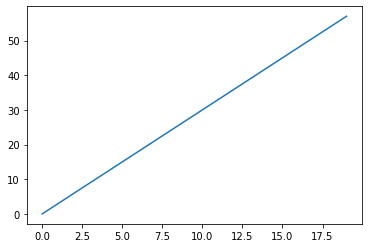

In [3]:
plt.plot(x,y)

## (2) Keras 모델링
keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [4]:
from keras import models, layers

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

Function 방식은 모델을 수식처럼 구현

Sequential 방식은 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

### Sequential Modeling

In [5]:
def modeling_sequential(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units =n_out, input_shape=(n_in,)))
    return model

In [6]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

### Functional Modeling

In [7]:
def modeling_functional(n_in, n_out):
    x = layers.Input(shape=(n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    return model

In [8]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### 모델 확인하기
생성된 모델은 내부함수인 summary()나, vis_utils의 model_to_dot()으로 모델 내부의 layers 구조 및 파라미터 수 등을 확인할 수 있음

In [9]:
model =  modeling_sequential(n_in, n_out)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

Model: "modeling_sequential_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model =  modeling_functional(n_in, n_out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = modeling_functional_class(n_in, n_out)
model.summary()

Model: "modeling_functional_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


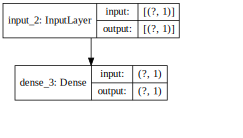

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## (3) 모델의 학습과정 설정
생성한 모델 객체의 compile 함수를 사용하여 학습과정 설정

모델의 학습시킬 때 사용할 loss function, optimizer, metric 등을 설정

https://keras.io/models/model/

In [14]:
model.compile(loss='mse', optimizer='sgd')

## (4) 모델 학습시키기
모델 객체의 fit 함수를 사용하여 모델을 학습

fit 함수는 학습과정이 담겨있는 history 객체를 반환

In [15]:
history = model.fit(x, y, batch_size=5, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 39ms/step - loss: 216.6039 - val_loss: 1.2320
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2978 - val_loss: 0.1515
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0116 - val_loss: 0.0277
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0134 - val_loss: 0.0058
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0110 - val_loss: 0.0316
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0100 - val_loss: 0.0378
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0109 - val_loss: 0.0486
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0135 - val_loss: 0.0295
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0861
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0180 - val_loss: 0.0415
Epoch 11/100
4/4 [=

## (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가

In [16]:
loss= model.evaluate(x_test, y_test, batch_size=20)
print('loss : %.4f'%(loss))

1/1 [==============================] - 0s 1ms/step - loss: 0.0301
loss : 0.0301


## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환

In [17]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(true_y, pred_y):
    print("true y : %.2f, prediction y : %.2f"%(y[0], y[1]))

true y : 300.00, prediction y : 299.70
true y : 303.00, prediction y : 302.69
true y : 306.00, prediction y : 305.69
true y : 309.00, prediction y : 308.69
true y : 312.00, prediction y : 311.68
true y : 315.00, prediction y : 314.68
true y : 318.00, prediction y : 317.68
true y : 321.00, prediction y : 320.67
true y : 324.00, prediction y : 323.67
true y : 327.00, prediction y : 326.67
true y : 330.00, prediction y : 329.66
true y : 333.00, prediction y : 332.66
true y : 336.00, prediction y : 335.66
true y : 339.00, prediction y : 338.65
true y : 342.00, prediction y : 341.65
true y : 345.00, prediction y : 344.65
true y : 348.00, prediction y : 347.64
true y : 351.00, prediction y : 350.64
true y : 354.00, prediction y : 353.64
true y : 357.00, prediction y : 356.63


# Boston 주택 가격 예측
    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000  
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's


In [18]:
import pandas as pd

In [19]:
boston_data = pd.read_csv('boston_house_prices.csv', header=0)

In [21]:
train_data = boston_data.iloc[:400]
val_data = boston_data.iloc[400:430]
test_data = boston_data.iloc[430:]

train_data.shape, val_data.shape, test_data.shape

((400, 14), (30, 14), (76, 14))

In [23]:
x_col = ["CRIM", "ZN","INDUS","CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
y_col = ["MEDV"]

In [24]:
train_x = train_data[x_col]
train_y = train_data[y_col]
val_x = val_data[x_col]
val_y = val_data[y_col]
test_x = test_data[x_col]
test_y = test_data[y_col]

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train_x)

MinMaxScaler()

In [29]:
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

In [67]:
boston_model = models.Sequential()
boston_model.add(layers.Input(len(x_col)))
# boston_model.add(layers.Dense(8))
# boston_model.add(layers.ReLU())
boston_model.add(layers.Dense(1))

In [68]:
boston_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [69]:
boston_model.compile(loss='mse')

In [70]:
history = boston_model.fit(train_x, train_y, epochs=200, validation_data=(val_x,val_y))

Epoch 1/200
13/13 [==============================] - 0s 6ms/step - loss: 699.2185 - val_loss: 183.9801
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 694.8187 - val_loss: 181.3434
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 691.1230 - val_loss: 179.0282
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 687.6036 - val_loss: 176.7076
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 684.1142 - val_loss: 174.4023
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 680.6337 - val_loss: 172.0752
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 677.1373 - val_loss: 169.7721
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 673.6523 - val_loss: 167.5298
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 670.1976 - val_loss: 165.3198
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss:

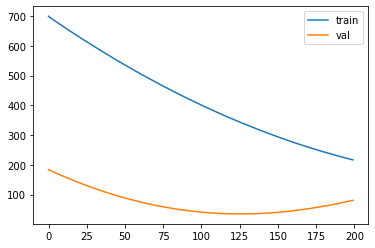

In [73]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [74]:
boston_model.evaluate(test_x,test_y)

3/3 [==============================] - 0s 1ms/step - loss: 34.4510


34.45102310180664

# 1.2 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [75]:
from keras.utils import np_utils
from keras import datasets
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

## (1) 데이터셋 다운로드
### Download the CIFAR-10 dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [76]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


label :  5


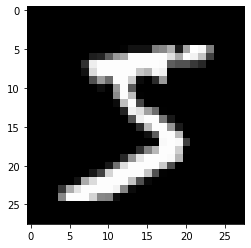

In [77]:
print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

input(X)를 flatten, normalize

output(Y)를 onehot encoding

In [78]:
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)

print(X_train_flat.shape, Y_train_onehot.shape)

(60000, 784) (60000, 10)


## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

https://keras.io/layers/core/#input

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

Activation : Activation Function을 정의, 문자열로 입력

https://keras.io/layers/core/#activation

In [79]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

### Functional Modeling

In [80]:
def linear_model_func(n_in, n_out):
    x = Input(shape=(n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)
    return model

### Sequential Modeling

In [81]:
def linear_model_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =n_out, input_shape=(n_in,), activation='softmax'))
    return model

In [82]:
model = linear_model_func(n_in, n_out)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


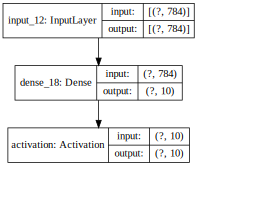

In [83]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정

https://keras.io/models/model/

In [84]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## (4) 모델 학습시키기

In [85]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 1.3602 - accuracy: 0.6730 - val_loss: 0.8866 - val_accuracy: 0.8246
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.7879 - accuracy: 0.8271 - val_loss: 0.6530 - val_accuracy: 0.8593
Epoch 3/20
375/375 [==============================] - 2s 7ms/step - loss: 0.6397 - accuracy: 0.8501 - val_loss: 0.5586 - val_accuracy: 0.8701
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5680 - accuracy: 0.8611 - val_loss: 0.5065 - val_accuracy: 0.8778
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5245 - accuracy: 0.8692 - val_loss: 0.4726 - val_accuracy: 0.8831
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4946 - accuracy: 0.8744 - val_loss: 0.4490 - val_accuracy: 0.8859
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4725 - accuracy: 0.8783 - val_loss: 0.4312 - val_accuracy: 0.8896
Epoch 

## (5) 모델 평가하기

In [86]:
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 6ms/step - loss: 0.3479 - accuracy: 0.9052
loss : 0.3479, accruracy : 0.9052


## (6) 모델 사용하기

predict label :  6


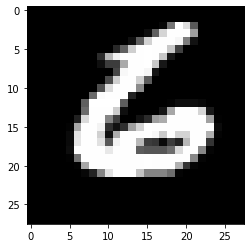

In [87]:
test_data = X_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1])
plt.imshow(X_test[-1], cmap='gray')

# 1.3 MNIST Classification with DNN (to do)
이번 실습에서는 keras로 DNN 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

Activation : Activation Function을 정의, 문자열로 입력
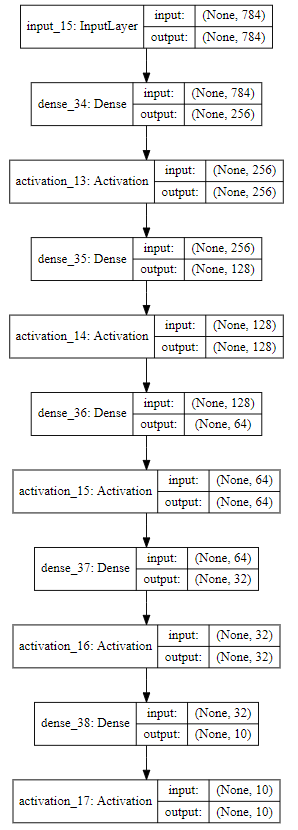

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

https://keras.io/layers/core/#activation

In [35]:
def DNN_func(n_in, n_out):


def DNN_seq(n_in, n_out):


In [36]:
n_in = 
n_out =
model = DNN_seq(n_in, n_out)

## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

## (5) 모델 평가하기

## (6) 모델 사용하기